In [1]:
# Tutorial 3, Analysis of  prefrontal cortex data,2021
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 14
from scipy.sparse import coo_matrix
import numpy.matlib
from numpy import linalg as LA


#matplotlib inline
#take the data in the task epoch
data=np.loadtxt('./Data/Dati_181014_maze.txt')

#read the number of colomn in the data
Ndata=np.size(data,0);
L=37
#the data are in units of 0.1 ms=1/10000 s

#parameters
#time bin =100 ms
dt=1000
#first time (0.1 ms)
tmin=np.min(data[:,0])
#last time(0.1 ms)
tmax=np.max(data[:,0])
#number of configurations
M=int((tmax-tmin)/dt)+1


Question 1

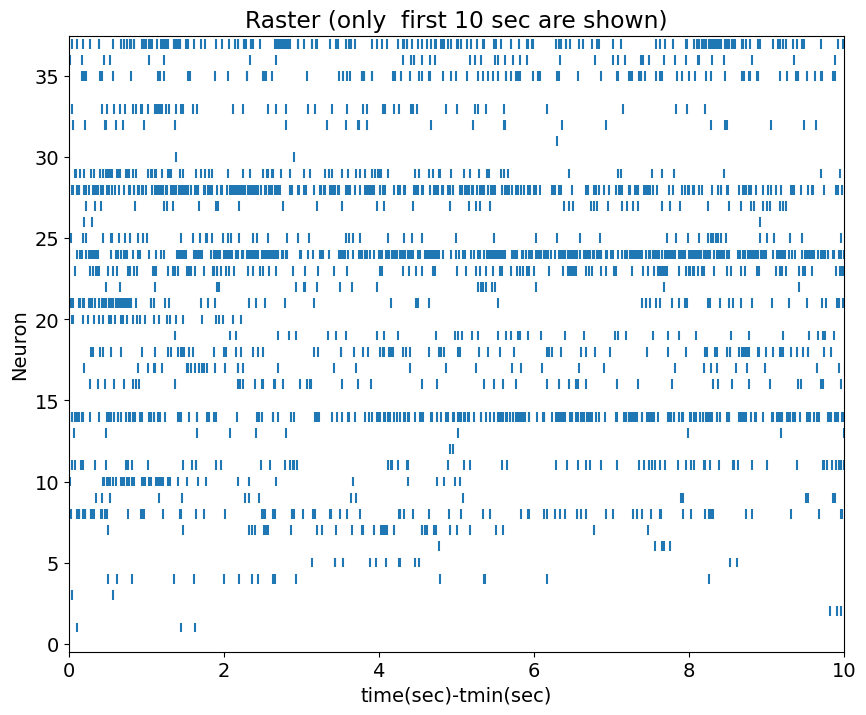

In [2]:
#Question 1: Raster Plot for the activity of the 37 cells  in the task for the first 10 seconds
# It is slow to run...
plt.xlim([0,10])
plt.ylim([-0.5,37.5])
plt.vlines((data[:,0]-tmin)/10000,data[:,1]-0.3,data[:,1]+0.3)
plt.xlabel('time(sec)-tmin(sec)')
plt.ylabel('Neuron')
plt.title('Raster (only  first 10 sec are shown)')
#plt.savefig('raster_task_dt01t1sec.pdf')
plt.show()

Question 2

In [3]:
#s=LxM activity matrix  describing number of spikes at each time bin [tb=1..M] for each neuron [i=1...38] 
#ta= index of the bin in which the neuron is active
ta=np.floor((data[:,0]-tmin)/dt)
#x index of active neuron 
x=np.ceil(data[:,1])-1
z=np.ones(Ndata)
# the coo_matrix add count if you have multiple occurrence in same bin
s_sparse=coo_matrix((z,(x,ta)),dtype=np.int8,shape=(L,M))
s=s_sparse.toarray()

In [4]:
#calculation of z-score
#y is a matrix M x L to adapt to the usual data format
def Zscore(s,M): 
    f=np.mean(s,1)
    sigma=np.std(s, axis=1, dtype=np.float64, ddof=1)
    pm = np.matlib.repmat(f,M,1)
    stam=np.matlib.repmat(sigma,M,1)
    y=(s.T-pm)/stam
    return y


In [5]:
#Pearson correlation matrix
y=Zscore(s,M)
#dqp=dq.transpose()
csp=np.dot(y.T,y)/M
eig, v =LA.eigh(csp)

In [6]:
#Marcenko pastur distribution
r=(L/M)
lambdam=np.power(1-np.sqrt(r),2)
lambdap=np.power(1+np.sqrt(r),2)

mp=np.zeros((1000,2))
l=lambdam
k=0
while(l<=lambdap):
        mp[k,0]=l
        mp[k,1]=np.sqrt((lambdap-l)*(l-lambdam))/(2*r*math.pi)
        l=l+0.0005
        k=k+1
mp=mp[0:k,:]

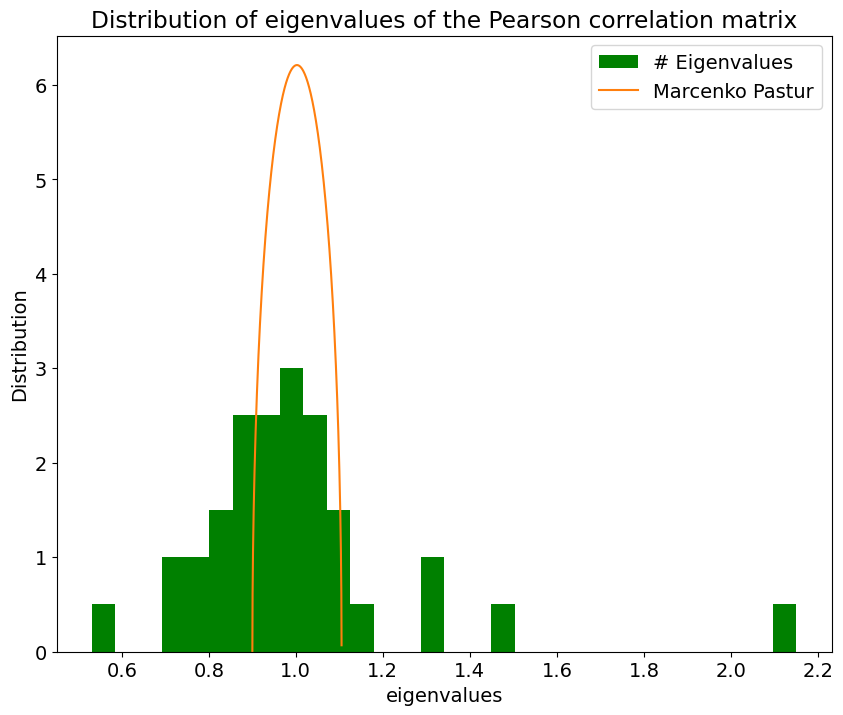

lambda-: 0.9001236178581365
lambdap: 1.1051298252768913
Principal components with eigenvalues>lambda+: 6


In [7]:
plt.hist(eig, bins=30, density=True, facecolor='green', label='# Eigenvalues')
#plt.hist(eig,50)
#plot marcenko pastur distribution
plt.plot(mp[:,0],mp[:,1],label='Marcenko Pastur')
plt.title("Distribution of eigenvalues of the Pearson correlation matrix")
plt.xlabel("eigenvalues")
plt.ylabel("Distribution")
plt.legend()
plt.show()
print('lambda-:',lambdam)
print('lambdap:',lambdap)
#Principal components with lambda>lambda+ 
#sort eigenvalues in reverse order
eigsort=np.sort(eig)[::-1]
eigsort_index=np.argsort(eig)[::-1]
#find the index at the border
N_pc=np.where(eigsort[:]<=lambdap)[0][0]
print('Principal components with eigenvalues>lambda+:',N_pc)
#signal components with eigenvalues>lambda+
eigs=eig[0:N_pc]
vs=v[:,eigsort_index[0:N_pc]]

Question 3

In [8]:
# Reshuffling of spiking matrix and Marcenko Pastur Spectrum
sh=s
for i in range (L):
    np.random.shuffle(sh[i,:])

In [9]:
#Pearson correlation matrix of the shuffled data
yr=Zscore(sh,M)
cspr=np.dot(yr.T,yr)/M
#eigenvalues and eigenvectors of cspr
eigh, vh =LA.eigh(cspr)

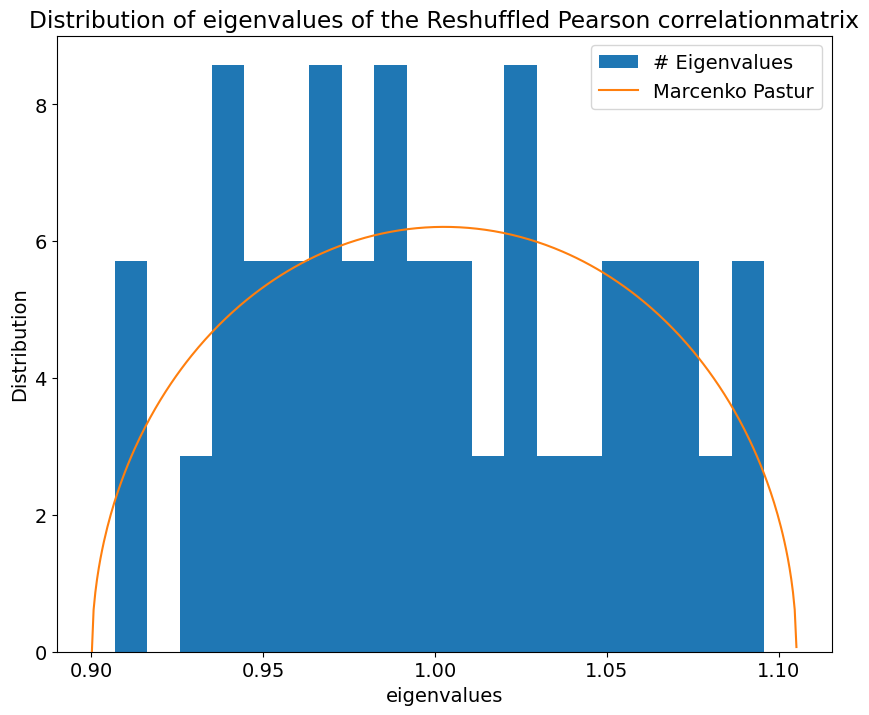

lambda-: 0.9001236178581365
lambdap: 1.1051298252768913
Principal components with eigenvalues>lambda+: 6


In [10]:
#plot eigenvalues histogram
plt.hist(eigh,20,density=True, label='# Eigenvalues')
#plot Marcenko Pastur distribution
plt.plot(mp[:,0],mp[:,1], label ='Marcenko Pastur')
plt.title("Distribution of eigenvalues of the Reshuffled Pearson correlationmatrix")
plt.xlabel("eigenvalues")
plt.ylabel("Distribution")
plt.legend()
plt.show()
print('lambda-:',lambdam)
print('lambdap:',lambdap)

#Principal components with lambda>lambda+ 
#sort eigenvalues in reverse order
eigsorth=np.sort(eigh)[::-1]
eigsorth_index=np.argsort(eigh)[::-1]
#find the index at the border
N_pch=np.where(eigsorth[:]<=lambdap)[0][0]
print('Principal components with eigenvalues>lambda+:',N_pc)
#signal components with eigenvalues>lambda+
eigsh=eigh[0:N_pc]
vsh=vh[:,eigsort_index[0:N_pc]]

Question 4

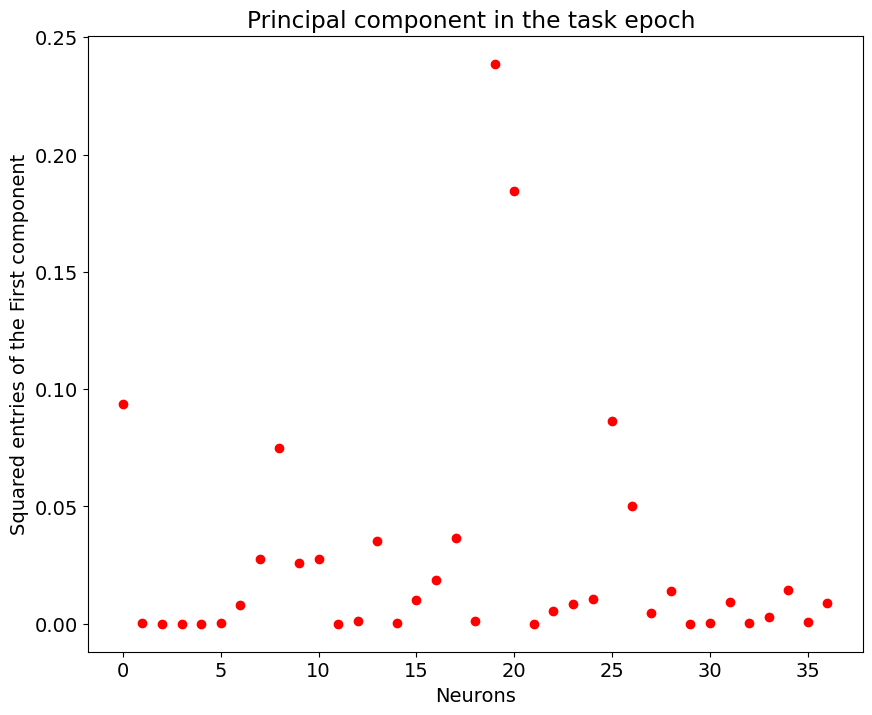

 Task cell assembly: [ 1  9 20 21 26 27]


In [11]:
#Principal component in the task epoch
x=np.arange(L)
y=np.power(vs[:,0],2)
plt.plot(x,y,'ro')
plt.title("Principal component in the task epoch ")
plt.xlabel("Neurons")
plt.ylabel("Squared entries of the First component")
plt.savefig('taskcellassembly.pdf')
plt.show()

#neurons which contributes the most to the first component: the neurons which are mostly correlated in the task
indcell=np.where(y[:]>0.05)
print(' Task cell assembly:',indcell[0][:]+1)

Question 5

In [12]:
#Data in the Sleep-Pre or Sleep Post epoch
#Sleep-Pre
#Match=1
#Sleep-Post
data1 = {}
data1['pre']=np.loadtxt('Data/Dati_181014_sleep1.txt')
data1['post']=np.loadtxt('Data/Dati_181014_sleep2.txt')

#Read the number of colomn in the data
Ndata1= {}
L=37
id=np.identity(L)
#The data are in units of 0.1 ms=10000 s

#parameters
#time bin =100 ms
dt=1000


#Number of configurations
M1= {}

#Total replay
Rp = {}

#Replay as a function of time on the 3 firsts pca component
rtl = [{}, {}, {}]

In [13]:
#Now we calculate the replay as function of time for the epochs
for key in data1.keys():
    Ndata1[key]=np.size(data1[key],0)
    #the data are in units of 0.1 ms=10000 s

    #first time (0.1 ms)
    tmin1=np.min(data1[key][:,0])
    #last time(0.1 ms)
    tmax1=np.max(data1[key][:,0])
    #number of configurations
    M1[key]=int((tmax1-tmin1)/dt)+1
    
    #Spiking matrix and pearson correlation matrix in the Sleep-Pre epoch 
    #y index of active neuron 
    y1=np.floor((data1[key][:,0]-tmin1)/dt)
    #x index of active neuron 
    x1=np.ceil(data1[key][:,1])-1

    z1=np.ones(Ndata1[key])
    s1_sparse=coo_matrix((z1,(x1,y1)),dtype=np.int8,shape=(L,M1[key]))
    s1=s1_sparse.toarray()
    
    #Pearson correlation matrix
    y1=Zscore(s1,M1[key])
    csp1=np.dot(y1.T,y1)/M1[key]
    f1=np.sum(s1,0)/M1[key]

    #Take first component il=0 (or other signal components il>0)
    for il in range(3):
        a=np.dot(y1[:,:],vs[:,il])
        ys=np.power(y1,2)
        vss=np.power(vs[:,il],2)
        a2=np.dot(ys[:,:],vss[:])
        a2p=np.power(a,2)
        rtl[il][key]= (a2p-a2)/2
    
    Rp[key] = .5 * np.trace( np.dot((csp-id),(csp1-id)) )

In [14]:
#Printing the total replays
print('Total replay in the sleep Pre',np.sum(Rp['pre'],0)/M1['pre'])
print('Total replay in the sleep Post',np.sum(Rp['post'],0)/M1['post'])

Total replay in the sleep Pre 1.6426039342266215e-05
Total replay in the sleep Post 3.336138299383277e-05


Question 6

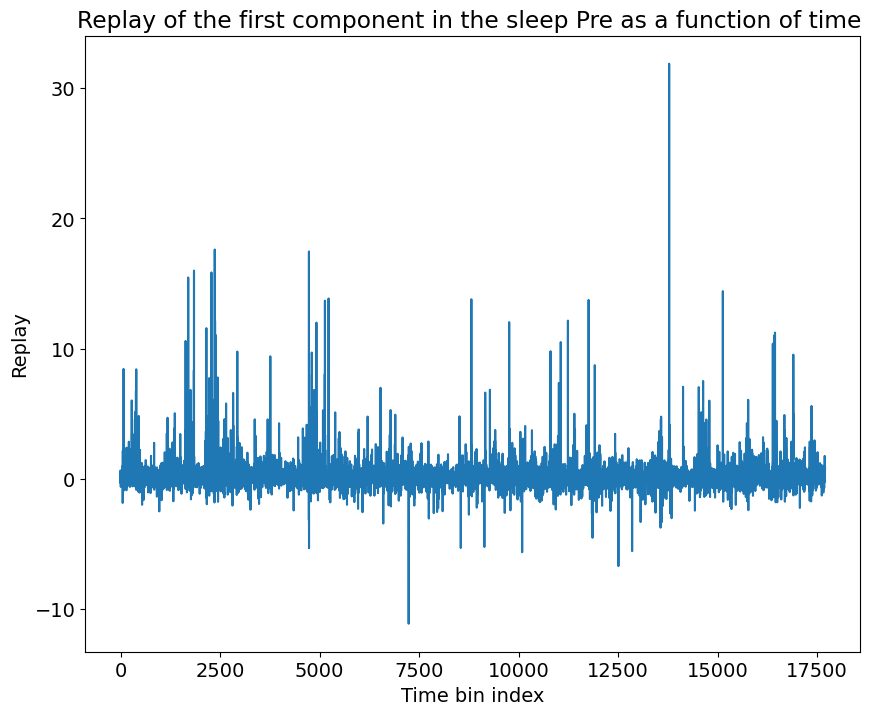

In [15]:
#Replay of the first PCA component as function of time for pre epoch
plt.plot(rtl[0]['pre'])
plt.title("Replay of the first component in the sleep Pre as a function of time ")
plt.ylabel("Replay")
plt.xlabel("Time bin index")
plt.show()

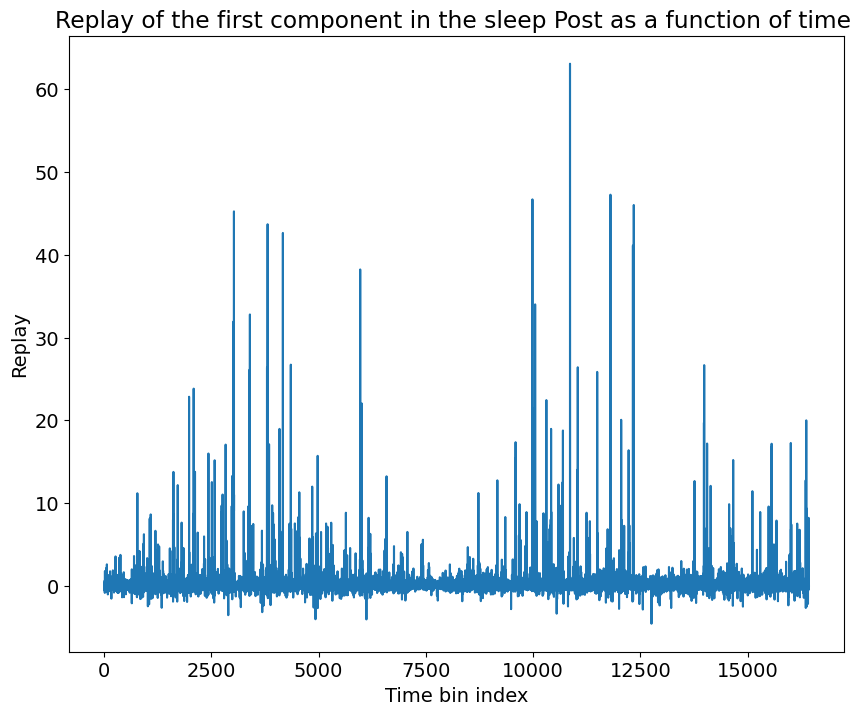

In [16]:
#Replay of the first PCA component as function of time for post epoch
plt.plot(rtl[0]['post'])
plt.title("Replay of the first component in the sleep Post as a function of time ")
plt.ylabel("Replay")
plt.xlabel("Time bin index")
plt.show()

Question 7

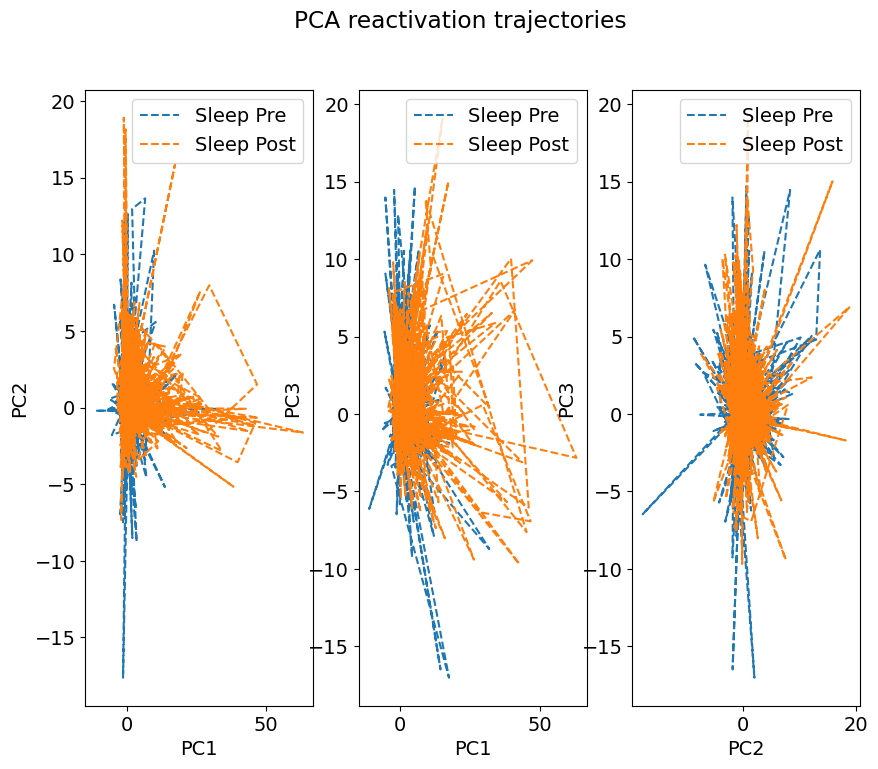

In [18]:
fig=plt.figure()

#Plot PCA trajectory in the PC1 - PC2 plane
ax1=fig.add_subplot(1,3,1)        
ax1.plot(rtl[0]['pre'],rtl[1]['pre'],'--',label='Sleep Pre')
ax1.plot(rtl[0]['post'],rtl[1]['post'],'--',label='Sleep Post')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()

#Plot PCA trajectory in the PC1 - PC3 plane
ax2=fig.add_subplot(1,3,2)        
ax2.plot(rtl[0]['pre'],rtl[2]['pre'],'--',label='Sleep Pre')
ax2.plot(rtl[0]['post'],rtl[2]['post'],'--',label='Sleep Post')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax2.legend()

#Plot PCA trajectory in the PC2 - PC3 plane
ax3=fig.add_subplot(1,3,3)        
ax3.plot(rtl[1]['pre'],rtl[2]['pre'],'--',label='Sleep Pre')
ax3.plot(rtl[1]['post'],rtl[2]['post'],'--',label='Sleep Post')
ax3.set_xlabel('PC2')
ax3.set_ylabel('PC3')
ax3.legend()

fig.suptitle('PCA reactivation trajectories') # or plt.suptitle('Main title')
plt.show()